In [1]:
options(device=pdf) # turn off flashy window on each block execution
# options(repr.plot.width=6, repr.plot.height=4)
Sys.setlocale("LC_ALL", "C")
initialWidth = getOption('width')
options(width=80) # for old folks like me who can't see shit and set font large

[1] "LC_CTYPE=C;LC_NUMERIC=C;LC_TIME=C;LC_COLLATE=C;LC_MONETARY=C;LC_MESSAGES=en_US.UTF-8;LC_PAPER=en_US.UTF-8;LC_NAME=C;LC_ADDRESS=C;LC_TELEPHONE=C;LC_MEASUREMENT=en_US.UTF-8;LC_IDENTIFICATION=C"

In [2]:
poll = read.csv('data/AnonymityPoll.csv.xz')
summary(poll)
str(poll)

  Internet.Use      Smartphone         Sex           Age       
 Min.   :0.0000   Min.   :0.0000   Female:505   Min.   :18.00  
 1st Qu.:1.0000   1st Qu.:0.0000   Male  :497   1st Qu.:37.00  
 Median :1.0000   Median :1.0000                Median :55.00  
 Mean   :0.7742   Mean   :0.5078                Mean   :52.37  
 3rd Qu.:1.0000   3rd Qu.:1.0000                3rd Qu.:66.00  
 Max.   :1.0000   Max.   :1.0000                Max.   :96.00  
 NA's   :1        NA's   :43                    NA's   :27     
          State           Region    Conservativeness Info.On.Internet
 California  :103   Midwest  :239   Min.   :1.000    Min.   : 0.000  
 Texas       : 72   Northeast:166   1st Qu.:3.000    1st Qu.: 2.000  
 New York    : 60   South    :359   Median :3.000    Median : 4.000  
 Pennsylvania: 45   West     :238   Mean   :3.277    Mean   : 3.795  
 Florida     : 42                   3rd Qu.:4.000    3rd Qu.: 6.000  
 Ohio        : 38                   Max.   :5.000    Max.   :11.000 

'data.frame':	1002 obs. of  13 variables:
 $ Internet.Use          : int  1 1 0 1 0 1 1 0 0 1 ...
 $ Smartphone            : int  0 0 1 0 NA 1 0 0 NA 0 ...
 $ Sex                   : Factor w/ 2 levels "Female","Male": 2 2 1 2 1 2 1 1 2 1 ...
 $ Age                   : int  62 45 70 70 80 49 52 76 75 76 ...
 $ State                 : Factor w/ 49 levels "Alabama","Arizona",..: 20 39 29 10 10 41 21 31 32 32 ...
 $ Region                : Factor w/ 4 levels "Midwest","Northeast",..: 2 3 2 3 3 3 1 2 3 3 ...
 $ Conservativeness      : int  4 1 4 4 4 4 3 3 4 4 ...
 $ Info.On.Internet      : int  0 1 0 3 NA 6 3 NA NA 0 ...
 $ Worry.About.Info      : int  1 0 0 1 NA 0 1 NA NA 0 ...
 $ Privacy.Importance    : num  100 0 NA 88.9 NA ...
 $ Anonymity.Possible    : int  0 1 0 1 NA 1 0 NA NA 1 ...
 $ Tried.Masking.Identity: int  0 0 0 0 NA 1 0 NA NA 0 ...
 $ Privacy.Laws.Effective: int  0 1 NA 0 NA 0 1 NA 0 1 ...


In [3]:
table(poll$Smartphone)


  0   1 
472 487 

In [4]:
table(poll$Sex, poll$Region)

        
         Midwest Northeast South West
  Female     123        90   176  116
  Male       116        76   183  122

In [18]:
t = table(subset(poll, Region == 'Midwest')$State)
#t[sort(t) > 0]
sort(t[t>0])

South Dakota North Dakota     Nebraska         Iowa       Kansas    Minnesota 
           3            5           11           14           14           15 
   Wisconsin     Missouri      Indiana     Michigan     Illinois         Ohio 
          23           26           27           31           32           38

In [12]:
tail(sort(table(subset(poll, Region == 'South')$State)))

Kentucky       Virginia North Carolina        Georgia        Florida 
            25             31             32             34             42 
         Texas 
            72

In [31]:
nrow(subset(poll, Internet.Use==F & Smartphone==F))
nrow(subset(poll, Internet.Use==T & Smartphone==T))
nrow(subset(poll, Internet.Use==T & Smartphone==F))
nrow(subset(poll, Internet.Use==F & Smartphone==T))

[1] 186

[1] 470

[1] 285

[1] 17

In [32]:
table(poll$Internet.Use, poll$Smartphone)

   
      0   1
  0 186  17
  1 285 470

In [35]:
summary(poll$Internet.Use)
summary(poll$Smartphone)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0000  1.0000  1.0000  0.7742  1.0000  1.0000       1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0000  0.0000  1.0000  0.5078  1.0000  1.0000      43 

In [36]:
limited = subset(poll, Internet.Use==T | Smartphone==T)
nrow(limited)

[1] 792

In [38]:
summary(limited)

  Internet.Use      Smartphone         Sex           Age       
 Min.   :0.0000   Min.   :0.0000   Female:392   Min.   :18.00  
 1st Qu.:1.0000   1st Qu.:0.0000   Male  :400   1st Qu.:33.00  
 Median :1.0000   Median :1.0000                Median :51.00  
 Mean   :0.9785   Mean   :0.6308                Mean   :48.57  
 3rd Qu.:1.0000   3rd Qu.:1.0000                3rd Qu.:62.00  
 Max.   :1.0000   Max.   :1.0000                Max.   :93.00  
                  NA's   :20                    NA's   :22     
            State           Region    Conservativeness Info.On.Internet
 California    : 89   Midwest  :172   Min.   :1.000    Min.   : 0.000  
 Texas         : 57   Northeast:128   1st Qu.:3.000    1st Qu.: 2.000  
 New York      : 45   South    :288   Median :3.000    Median : 4.000  
 Pennsylvania  : 33   West     :204   Mean   :3.237    Mean   : 3.795  
 Florida       : 32                   3rd Qu.:4.000    3rd Qu.: 6.000  
 North Carolina: 28                   Max.   :5.000    M

In [39]:
table(limited$Info.On.Internet)


  0   1   2   3   4   5   6   7   8   9  10  11 
105  84  95 101 104  94  67  63  40  18  13   8 

In [51]:
table(subset(limited, !is.na(Worry.About.Info))$Worry.About.Info)



  0   1 
404 386 

In [52]:
386 / (386 + 404)


[1] 0.4886076

In [53]:
table(limited$Worry.About.Info)


  0   1 
404 386 

In [54]:
table(limited$Anonymity.Possible)


  0   1 
475 278 

In [55]:
278/(278+475)

[1] 0.3691899

In [56]:
summary(limited$Anonymity.Possible)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0000  0.0000  0.0000  0.3692  1.0000  1.0000      39 

In [57]:
summary(limited$Tried.Masking.Identity)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0000  0.0000  0.0000  0.1633  0.0000  1.0000       8 

In [58]:
summary(limited$Privacy.Laws.Effective)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0000  0.0000  0.0000  0.2558  1.0000  1.0000      65 

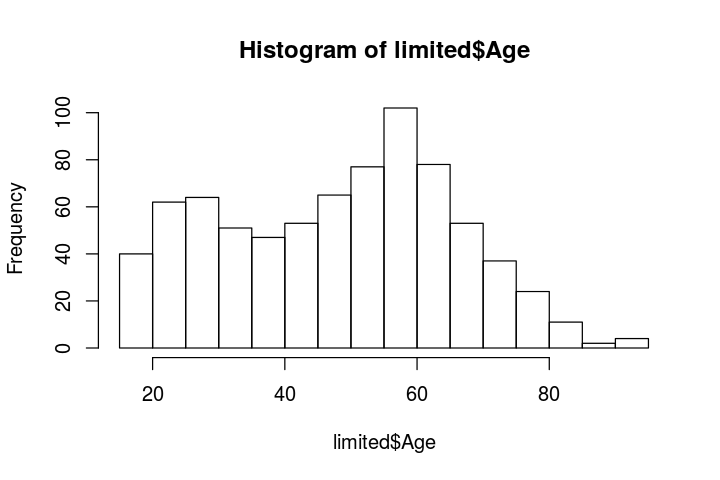

In [60]:
options(repr.plot.width=6, repr.plot.height=4)
hist(limited$Age)

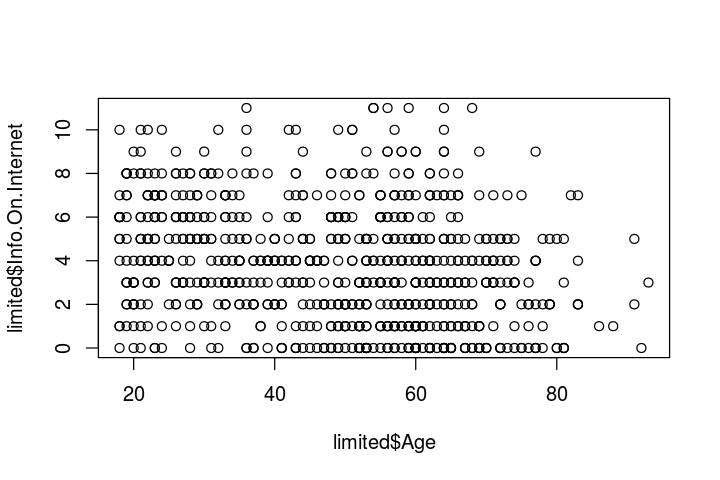

In [61]:
plot(limited$Age, limited$Info.On.Internet)

In [69]:
t = table(limited$Age, limited$Info.On.Internet)
#t = table(limited$Info.On.Internet, limited$Age)
#t[t>0]
max(t)
t

[1] 6

    
     0 1 2 3 4 5 6 7 8 9 10 11
  18 1 2 0 0 1 2 5 1 0 0  1  0
  19 0 1 2 3 1 1 1 2 4 0  0  0
  20 1 1 3 4 1 0 0 0 1 1  0  0
  21 1 1 1 0 2 3 2 0 2 1  1  0
  22 0 1 1 2 2 3 1 3 1 0  1  0
  23 2 0 0 2 3 2 3 5 1 0  0  0
  24 1 1 0 0 1 0 2 3 1 0  1  0
  25 0 0 1 0 3 1 0 0 0 0  0  0
  26 0 1 2 3 0 1 3 1 2 1  0  0
  27 0 0 0 3 1 2 3 1 1 0  0  0
  28 1 1 1 1 1 3 3 1 2 0  0  0
  29 0 0 3 1 0 3 1 3 0 0  0  0
  30 0 1 0 4 0 4 2 0 2 1  0  0
  31 1 1 0 1 1 2 1 1 2 0  0  0
  32 1 0 1 1 1 0 0 0 1 0  1  0
  33 0 1 3 4 2 1 2 4 0 0  0  0
  34 0 0 0 2 1 1 1 1 1 0  0  0
  35 0 0 2 2 4 1 1 1 0 0  0  0
  36 2 0 1 1 0 2 1 0 1 1  1  1
  37 2 0 4 1 2 0 0 0 1 0  0  0
  38 0 2 0 1 2 1 0 0 0 0  0  0
  39 1 0 2 1 5 0 1 0 1 0  0  0
  40 0 0 3 0 3 3 0 0 0 0  0  0
  41 3 1 2 1 2 0 0 0 0 0  0  0
  42 0 0 0 2 2 1 1 1 0 0  1  0
  43 3 1 0 1 3 0 2 1 2 0  1  0
  44 1 1 1 2 0 3 0 2 0 1  0  0
  45 1 1 1 1 5 2 0 0 0 0  0  0
  46 1 1 1 0 3 0 0 1 0 0  0  0
  47 2 0 3 1 2 0 0 0 0 0  0  0
  48 2 2 1 0 0 2 4 1 2 0  0  0
  4

In [71]:
jitter(c(1,2,3))

[1] 1.143267 2.199794 2.943030

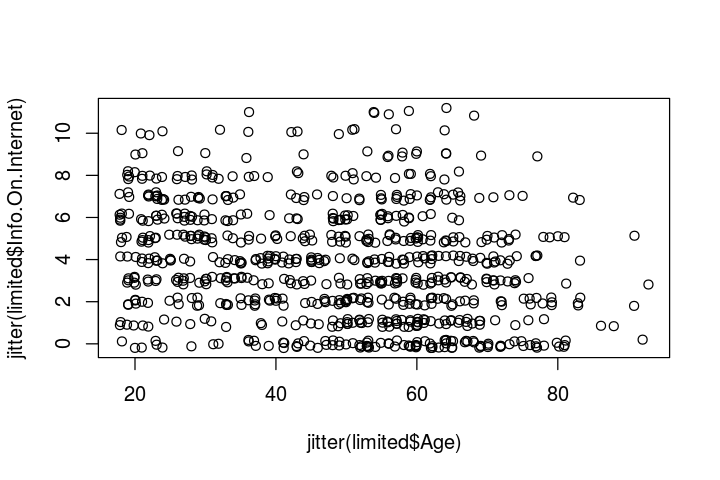

In [72]:
plot(jitter(limited$Age), jitter(limited$Info.On.Internet))

In [77]:
tapply(limited$Info.On.Internet, limited$Smartphone, mean)

0        1 
2.922807 4.367556

In [78]:
tapply(limited$Info.On.Internet, limited$Smartphone, summary)

ERROR: Error in vapply(seq_along(mapped), function(i) {: values must be length 1,
 but FUN(X[[1]]) result is length 0


$`0`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   3.000   2.923   5.000  11.000 

$`1`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.000   4.000   4.368   6.000  11.000 


In [79]:
tapply(limited$Tried.Masking.Identity, limited$Smartphone, summary)

ERROR: Error in vapply(seq_along(mapped), function(i) {: values must be length 1,
 but FUN(X[[1]]) result is length 0


$`0`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0000  0.0000  0.0000  0.1174  0.0000  1.0000       4 

$`1`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0000  0.0000  0.0000  0.1925  0.0000  1.0000       4 
